<a href="https://colab.research.google.com/github/Hansi1007/Colaboratory_Test/blob/main/linear_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Dependencies

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
def make_noisy_data(w = 0.1, b = 0.3 , n=100):
  x = np.random.uniform(1, 0.01, n)
  noise = np.random.normal(1, 0.01, n)
  y = w * x + b  + noise
  return x, y

In [ ]:
x_train, y_train = make_noisy_data()

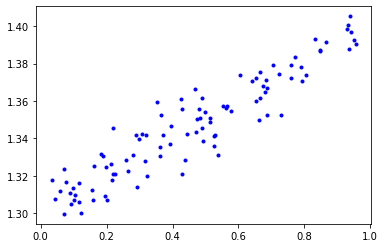

In [ ]:
plt.plot(x_train, y_train, 'b.')
#plt.plot(x_train, 0.1 * x_train + 0.3, 'r.')


In [ ]:
# Representiert das Model für die lineare Regression also die Gerade y = m*x + b
def predict(w, b, x):
  return w*x +b

In [ ]:
# Fehler des Models
def avg_loss(w, b, x, y):
  N = len(x)
  e = 0
  for i in range(0, N):
    e += (y[i] - (w*x[i] + b))**2   # summe der Fehler quadrate
  return 1/N * e                    # mean

In [ ]:
def update_w_and_b(w, b, x, y, alpha):
  # Gradient descent
  N = len(x)

  d1_dw = 0
  d1_db = 0
  for i in range(0, N):
    # Partielen Ableitungen der Fehlerfunktion nach w und b
    d1_db += -2 * ( y[i] - (w*x[i] + b) )
    d1_dw += -2 * x[i] * (y[i] - (w*x[i] +b) )

  b = b - (1/N) * d1_db * alpha
  w = w - (1/N) * d1_dw * alpha
  return w, b




In [ ]:
def train(x, y, epoche=100, alpha=0.01):
  w = 0
  b = 0
  for epoch in range(0,epoche):
    w, b = update_w_and_b(w, b , x, y, alpha)

    if(epoch % 100 == 0):
      print("epoche:", epoch, " loss:", avg_loss(w, b, x, y))
  return w, b

epoche: 0  loss: 1.7271590054038106
epoche: 100  loss: 0.022584247113150352
epoche: 200  loss: 0.008514196482215934
epoche: 300  loss: 0.006758204300469638
epoche: 400  loss: 0.00542112700026201
epoche: 500  loss: 0.004352622208047443
epoche: 600  loss: 0.0034983705133356576
epoche: 700  loss: 0.002815407960549091
epoche: 800  loss: 0.0022693887168449174
epoche: 900  loss: 0.001832853780386708
epoche: 1000  loss: 0.0014838500539680146
epoche: 1100  loss: 0.001204826335861104
epoche: 1200  loss: 0.0009817506797209583
epoche: 1300  loss: 0.0008034047358707997
epoche: 1400  loss: 0.0006608195867865805
epoche: 1500  loss: 0.0005468247052632284
epoche: 1600  loss: 0.0004556873526217746
epoche: 1700  loss: 0.0003828242824953209
epoche: 1800  loss: 0.00032457125193890806
epoche: 1900  loss: 0.00027799874870624355
epoche: 2000  loss: 0.00024076466772129335
epoche: 2100  loss: 0.00021099652792712955
epoche: 2200  loss: 0.00018719730626343652
epoche: 2300  loss: 0.00016817015321611458
epoche: 24

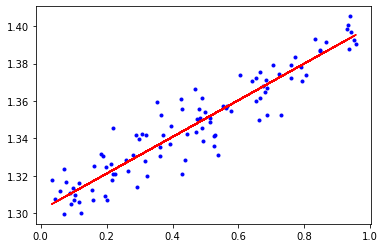

In [ ]:
w, b = train(x_train, y_train, epoche = 5000)

print("w:", w)
print("b:", b)

plt.plot(x_train, y_train, 'b.')
plt.plot(x_train, predict(w, b, x_train), 'r')


In [ ]:
print("w:", w, " b: ",  b)

w: 0.09800914811845576  b:  1.301581230291201


### Lineare Regression und Anwendung in Python
https://statisquo.de/2018/03/23/lineare-regression-und-implementierung-in-python/

In [ ]:
from scipy.stats import linregress

**Scipy** hat eine eigene Funktion für **lineare Regressionsanalyse**. Als Argumente weist man ihr jeweils einen Array der x– und der y-Werte zu. Neben Numpy-Arrays akzeptiert die Funktion auch Listen, Tupel und Pandas Series. Als Ergebnis erhalten wir dann die Steigung, den Achsenabschnitt, den Korrelationskoeffizienten nach Pearson (R), den p-Wert und die Standardabweichung. Die einzelnen Werte kann man in dieser Reihenfolge auch gleich beim Aufrufen der Funktion in separate Objekte entpacken. So kann man anschließend besser mit den Kennzahlen arbeiten.

In [ ]:
#slope, intercept, rvalue, pvalue and stderr
w, b, r, p, std = linregress(x_train, y_train)
print("Slope/Steigung:", w)
print("intercept/Achsenabschnitt", b)
print(r)
print(p)
print(std)

Slope/Steigung: 0.09639298851487725
intercept/Achsenabschnitt 1.3023682256015245
0.9344698893364907
9.575611083348553e-46
0.003709954070128698


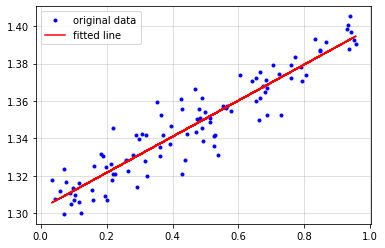

In [ ]:
predict = lambda slope, itercept, x: slope*x + itercept

plt.plot(x_train, y_train, 'b.', label='original data')
plt.plot(x_train, predict(w, b, x_train), 'r', label='fitted line')
plt.legend()
plt.grid(alpha=0.5)
# print(predict(w, b, x_train))

### Prof.Weitz - Lineare Regression
https://www.youtube.com/watch?v=sHT33y694N8&list=PLb0zKSynM2PCmp5J5LWM3PcZXBaCoQkXj&index=39

In [ ]:
import numpy as np

def lift(arr):
  arr = np.array(arr)
  return arr.reshape((arr.shape[0], 1))


In [ ]:
# lift([1,42,10])

In [ ]:
from sklearn.linear_model import LinearRegression

In [ ]:
X = x_train
Y = y_train

model = LinearRegression()
model.fit(lift(X), lift(Y))

model.predict([[0.3]])


array([[1.33128612]])

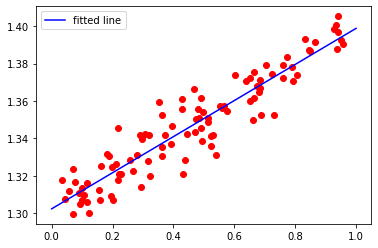

In [ ]:
plt.figure()
plt.scatter(X, Y, c = 'r')

x = np.linspace(0,1,10)
plt.plot(x, model.predict(lift(x)), c = 'b', label='fitted line')
plt.legend()
plt.show()

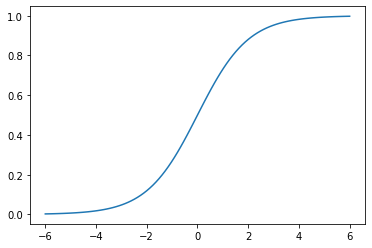

In [ ]:
# logistische Funktion
x = np.linspace(6,-6,100)
y = 1/ (1 + np.exp(-x))
plt.plot(x,y)